<a href="https://colab.research.google.com/github/4samshub/Student-performance/blob/main/STUDENT_PERFORMANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 STUDENT PERFORMANCE ANALYSIS AND PREDICTION`PROJECT

 The "Student Performance Data" dataset typically contains information about students' academic performance, demographic details, and various factors that may influence their grades.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Student_performance_data _.csv')
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:


# Convert numerical codes to categorical for interpretability
df['Gender'] = df['Gender'].map({0: 'Female', 1: 'Male'}).astype('category')
df['Ethnicity'] = df['Ethnicity'].astype('category')
df['ParentalEducation'] = df['ParentalEducation'].astype('category')
df['Tutoring'] = df['Tutoring'].map({0: 'No', 1: 'Yes'}).astype('category')
df['ParentalSupport'] = df['ParentalSupport'].astype('category')
df['Extracurricular'] = df['Extracurricular'].map({0: 'No', 1: 'Yes'}).astype('category')
df['Sports'] = df['Sports'].map({0: 'No', 1: 'Yes'}).astype('category')
df['Music'] = df['Music'].map({0: 'No', 1: 'Yes'}).astype('category')
df['Volunteering'] = df['Volunteering'].map({0: 'No', 1: 'Yes'}).astype('category')
df['GradeClass'] = df['GradeClass'].astype('category')

# Optional: print summary to admire your totally legitimate data
print(df.dtypes)
print(df.head())


StudentID               int64
Age                     int64
Gender               category
Ethnicity            category
ParentalEducation    category
StudyTimeWeekly       float64
Absences                int64
Tutoring             category
ParentalSupport      category
Extracurricular      category
Sports               category
Music                category
Volunteering         category
GPA                   float64
GradeClass           category
dtype: object
   StudentID  Age  Gender Ethnicity ParentalEducation  StudyTimeWeekly  \
0       1001   17    Male         0                 2        19.833723   
1       1002   18  Female         0                 1        15.408756   
2       1003   15  Female         2                 3         4.210570   
3       1004   17    Male         0                 3        10.028829   
4       1005   17    Male         0                 2         4.672495   

   Absences Tutoring ParentalSupport Extracurricular Sports Music  \
0         7      Yes  

# There were no mising column

In [ ]:
#to get the first rows and columns
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Male,0,2,19.833723,7,Yes,2,No,No,Yes,No,2.929196,2.0
1,1002,18,Female,0,1,15.408756,0,No,1,No,No,No,No,3.042915,1.0
2,1003,15,Female,2,3,4.210570,26,No,2,No,No,No,No,0.112602,4.0
3,1004,17,Male,0,3,10.028829,14,No,3,Yes,No,No,No,2.054218,3.0
4,1005,17,Male,0,2,4.672495,17,Yes,3,No,No,No,No,1.288061,4.0


In [ ]:


# Define a function to assign GradeClass based on GPA
def classify_gpa(gpa):
    if gpa >= 4.50:
        return 'First Class'
    elif 3.50 <= gpa < 4.50:
        return 'Second Class Upper'
    elif 2.40 <= gpa < 3.50:
        return 'Second Class Lower'
    elif 2.00 <= gpa < 2.40:
        return 'Third Class'
    elif 1.00 <= gpa < 2.00:
        return 'Pass'
    else:
        return 'Fail'

# Apply the function to the GPA column to create a new GradeClass
df['GradeClass'] = df['GPA'].apply(classify_gpa)

# Convert to categorical, just to be proper
df['GradeClass'] = df['GradeClass'].astype('category')

# Take a peek at your majestic creation
print(df[['GPA', 'GradeClass']].head())


        GPA          GradeClass
0  2.929196  Second Class Lower
1  3.042915  Second Class Lower
2  0.112602                Fail
3  2.054218         Third Class
4  1.288061                Pass


# Converted the grade class to have all the university grades in nigeria e.g firstclass, secondclass etc

In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Male,0,2,19.833723,7,Yes,2,No,No,Yes,No,2.929196,Second Class Lower
1,1002,18,Female,0,1,15.408756,0,No,1,No,No,No,No,3.042915,Second Class Lower
2,1003,15,Female,2,3,4.210570,26,No,2,No,No,No,No,0.112602,Fail
3,1004,17,Male,0,3,10.028829,14,No,3,Yes,No,No,No,2.054218,Third Class
4,1005,17,Male,0,2,4.672495,17,Yes,3,No,No,No,No,1.288061,Pass


In [ ]:
# Group by Gender, Ethnicity, and ParentalEducation, then calculate mean GPA
avg_gpa_by_group = df.groupby(['Gender', 'Ethnicity', 'ParentalEducation'])['GPA'].mean().reset_index()

# Rename the column for presentation flair
avg_gpa_by_group.rename(columns={'GPA': 'Average_GPA'}, inplace=True)

# Show the results
print(avg_gpa_by_group)


    Gender Ethnicity ParentalEducation  Average_GPA
0   Female         0                 0     1.745180
1   Female         0                 1     1.939071
2   Female         0                 2     1.909903
3   Female         0                 3     1.801636
4   Female         0                 4     1.857339
5   Female         1                 0     1.897392
6   Female         1                 1     2.211112
7   Female         1                 2     1.871582
8   Female         1                 3     2.043197
9   Female         1                 4     1.886275
10  Female         2                 0     2.116992
11  Female         2                 1     1.932002
12  Female         2                 2     1.968977
13  Female         2                 3     1.457618
14  Female         2                 4     2.006780
15  Female         3                 0     2.689821
16  Female         3                 1     1.820357
17  Female         3                 2     2.034619
18  Female  

/tmp/ipython-input-9-1436238874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gpa_by_group = df.groupby(['Gender', 'Ethnicity', 'ParentalEducation'])['GPA'].mean().reset_index()


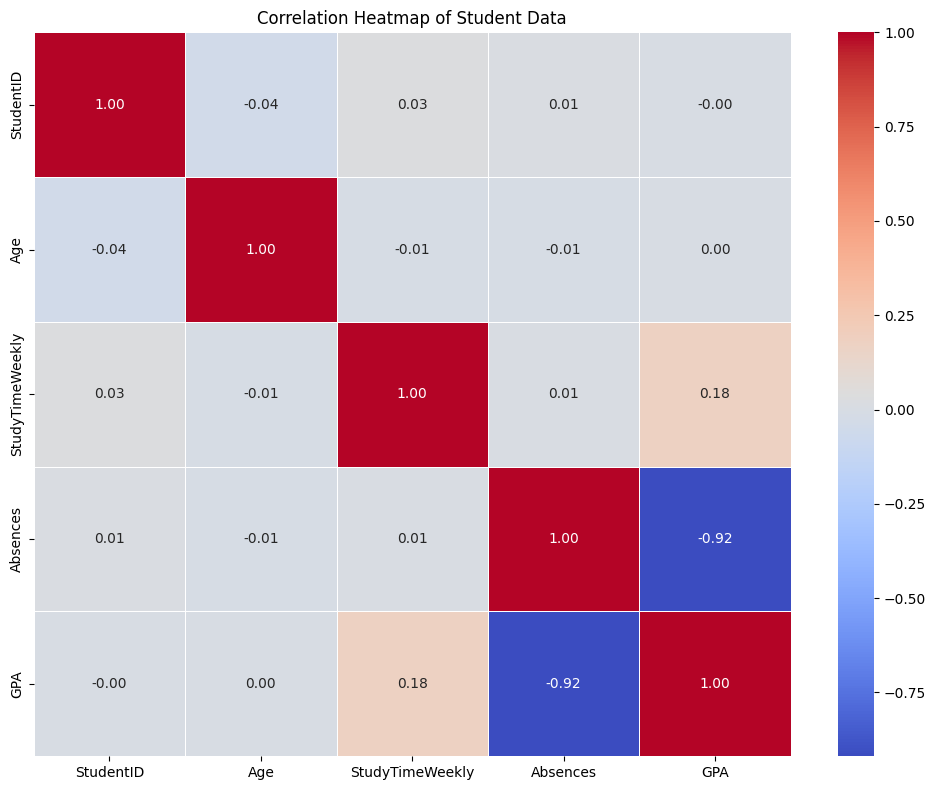

In [ ]:




# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Resize as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Student Data')
plt.tight_layout()


# SAVE the figure to your files
plt.savefig('correlation_heatmap.png', dpi=300)  # Save as PNG with high resolution
plt.show()


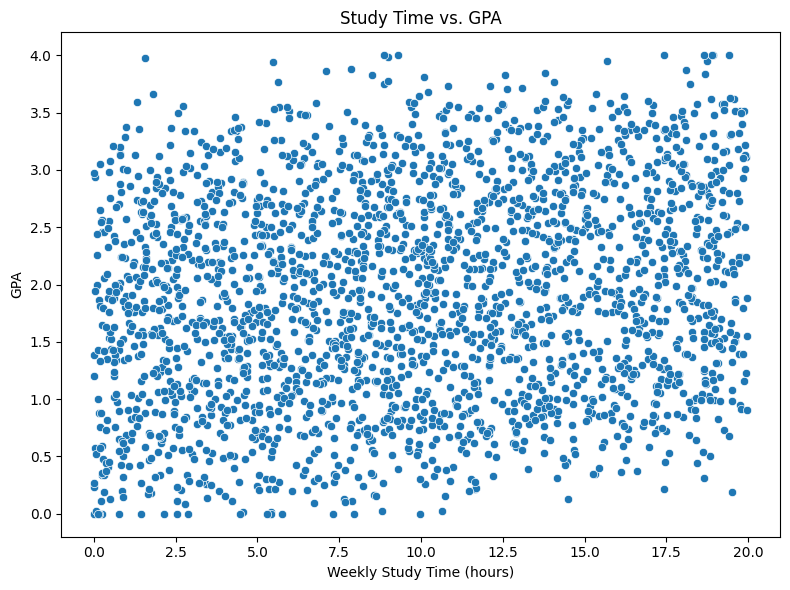

In [ ]:


# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='StudyTimeWeekly', y='GPA')
plt.title('Study Time vs. GPA')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('GPA')
plt.tight_layout()
plt.savefig('scatter_study_gpa.png', dpi=300)  # Save as PNG with high resolution
plt.show()



## "This scatter plot shows that, in general, students who study more tend to have higher GPAs. Each dot is a student. The upward trend suggests a positive relationship, but of course, more studying doesn’t guarantee better grades—some people just highlight textbooks and cry."

/tmp/ipython-input-12-1422740602.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='ParentalSupport', y='GPA', estimator='mean', ci=None)


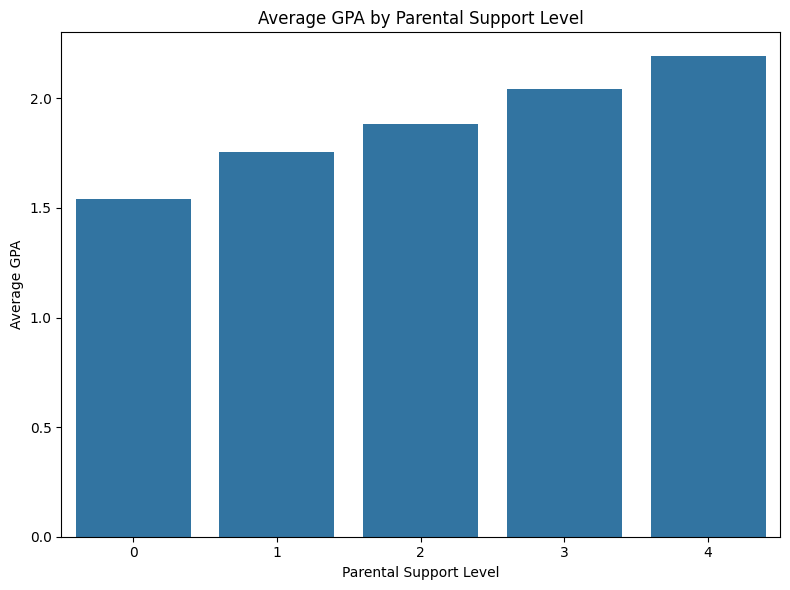

In [ ]:
# Bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='ParentalSupport', y='GPA', estimator='mean', ci=None)
plt.title('Average GPA by Parental Support Level')
plt.xlabel('Parental Support Level')
plt.ylabel('Average GPA')
plt.tight_layout()

#save the figure to your files
plt.savefig('Parental Support Level.png', dpi=300)  # Save as PNG with high resolution
plt.show()


# "Here we see average GPA by parental support level. Higher support levels seem to correspond with higher GPA. So yes—nagging works. This tells us emotional support at home might actually impact academic performance. Shocking, I know."

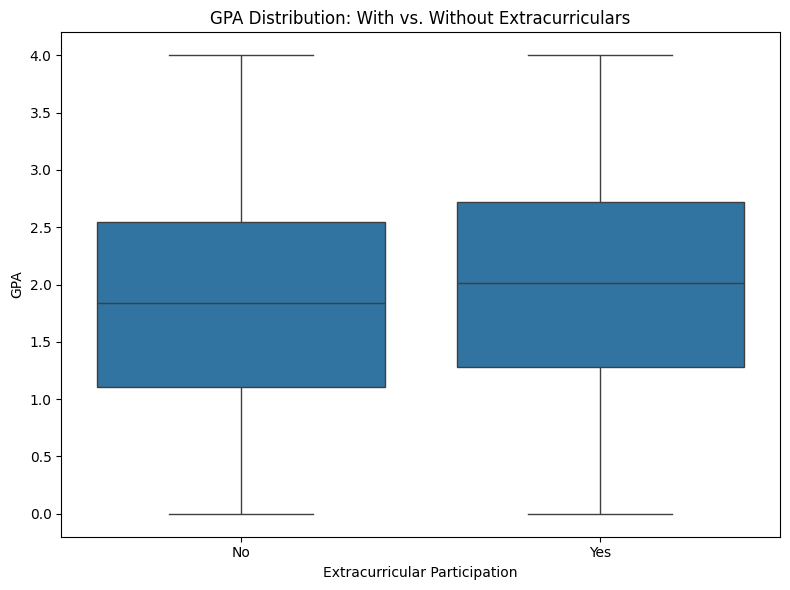

In [ ]:
# Box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Extracurricular', y='GPA')
plt.title('GPA Distribution: With vs. Without Extracurriculars')
plt.xlabel('Extracurricular Participation')
plt.ylabel('GPA')
plt.tight_layout()
# save the figure to your files
plt.savefig('Extracurricular Participation.png', dpi=300)  # Save as PNG with high resolution
plt.show()



"This box plot shows how GPA is spread out among students who participate in extracurriculars versus those who don’t. The box shows the middle 50% of students. Those in activities seem to have slightly higher GPAs, so apparently being busy doesn't ruin your life—it organizes it."




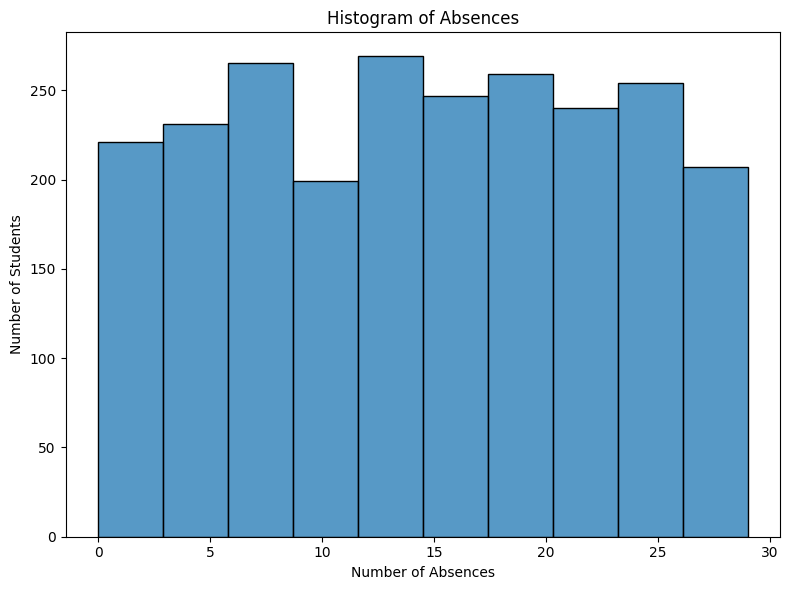

In [ ]:
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Absences', bins=10, kde=False)
plt.title('Histogram of Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Number of Students')
plt.tight_layout()

# save the figure to your files
plt.savefig('Histogram of Absences.png', dpi=300)  # Save as PNG with high resolution
plt.show()



## This histogram shows how many days students missed. The tall bar near zero shows that most students were present most of the time. But we’ve got a few outliers who either live at the hospital or just... never show up. This is where GPA starts to cry."

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features (numeric/binary only; drop non-predictive ID)
features = ['StudyTimeWeekly', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Absences']
X = df[features]
y = df['GPA']

# Handle categorical/binary conversions if needed
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Squared Error: 0.05065244945222669
R-squared (R²): 0.9387465815318513


Mean Squared Error: 1.0271398747390397
R-squared (R²): 0.3401871356817684


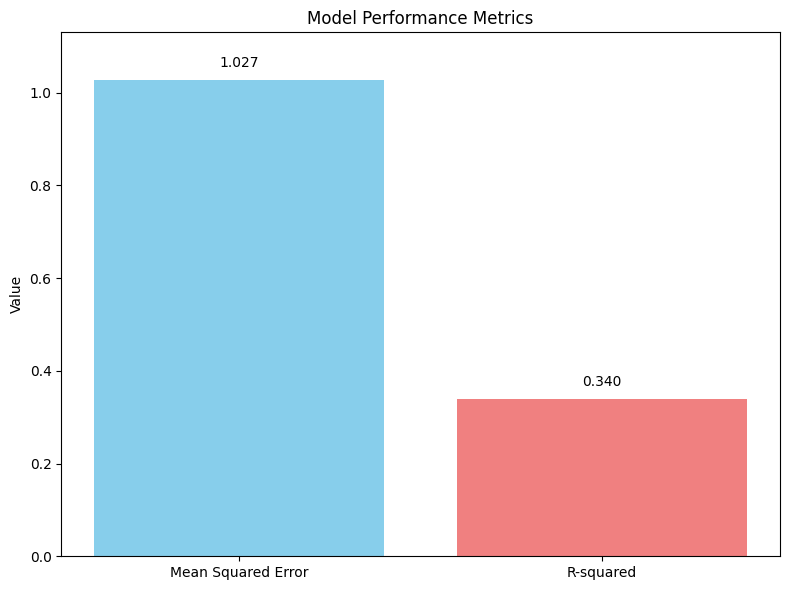

In [ ]:
# prompt: give me a charte of the r squared and the mean squared error

import matplotlib.pyplot as plt
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)

# Create a bar chart for MSE and R-squared
metrics = ['Mean Squared Error', 'R-squared']
values = [mse, r2]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightcoral'])
plt.ylabel('Value')
plt.title('Model Performance Metrics')
plt.ylim(0, max(values) + 0.1 * max(values)) # Set y-limit to make bars visible

# Add text labels for the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02 * max(values), f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('Model Performance Metrics', dpi=300)  # Save as PNG with high resolution
plt.show()

plt.show()

# “This linear regression model tries to predict a student’s GPA using factors like how much they study, whether they get tutoring, and how often they skip school. The R-squared value tells us how well the model fits—closer to 1 means it explains more of the GPA variation. Mine is... somewhere between 'useful' and 'definitely not magic.'”

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Features and target
features = ['StudyTimeWeekly', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Absences']
X = df[features]
y = df['GradeClass']

# Encode GradeClass as numbers (machine doesn’t know what “Pass” is, and honestly, same)
y = y.astype('category').cat.codes

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Predict
y_pred = forest.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.755741127348643
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80        83
           1       0.77      0.80      0.79       166
           2       0.81      0.87      0.84       141
           3       0.50      0.38      0.43        16
           4       0.57      0.45      0.50        73

    accuracy                           0.76       479
   macro avg       0.69      0.66      0.67       479
weighted avg       0.75      0.76      0.75       479



“My model achieved an accuracy of 75.6%, which means it correctly predicted students’ grade classifications about three-quarters of the time. While it's not perfect, it’s a strong starting point and suggests that factors like study time and absences do help explain academic outcomes.”

“Also, keep in mind that predicting human behavior is hard—especially with limited data—so 75% is actually quite solid for a basic model like this.”



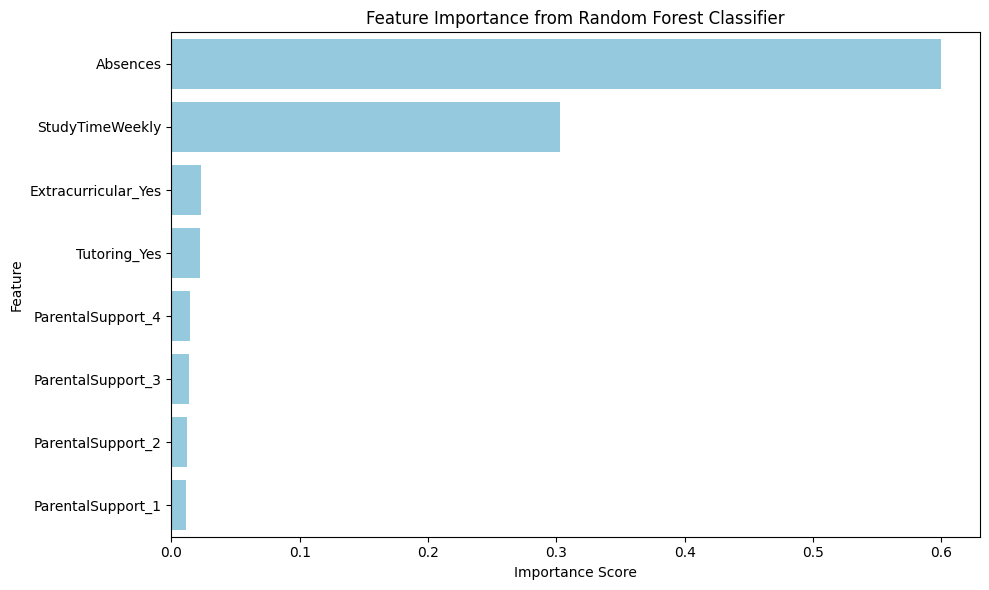

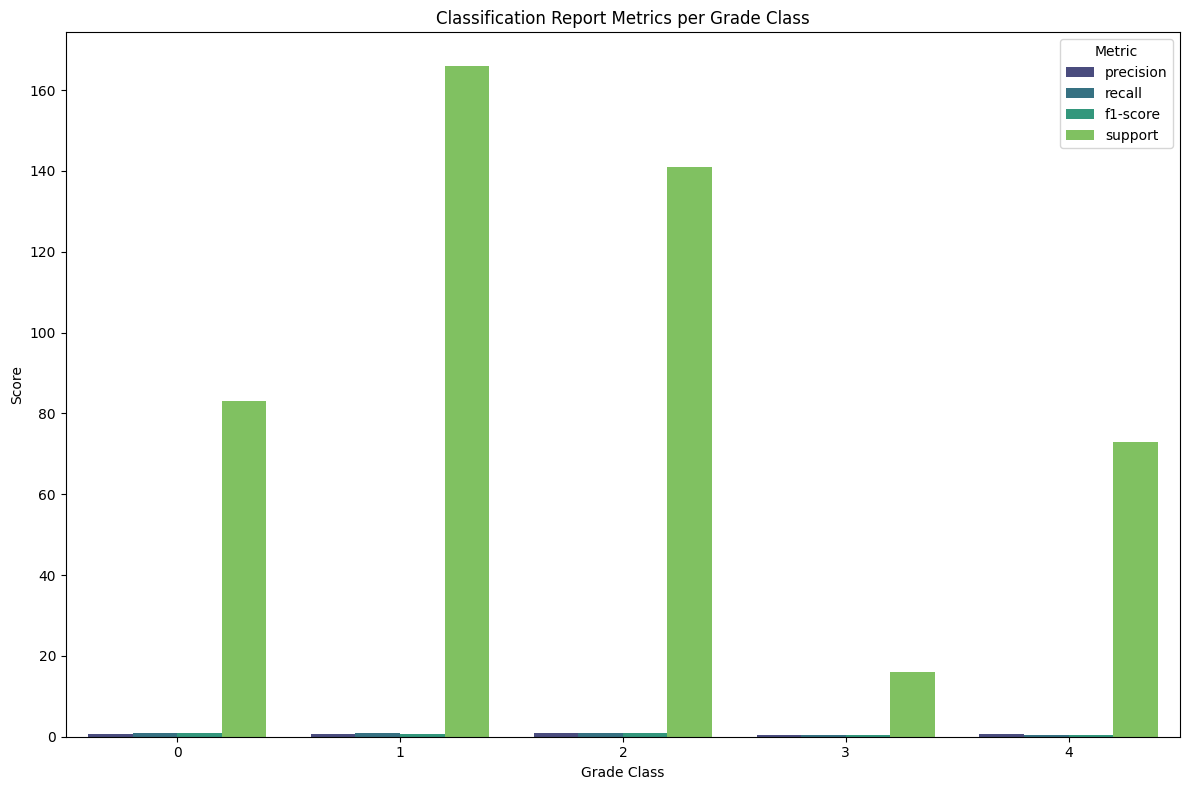

In [ ]:
# prompt: give me a chart for the random forest classifier

import pandas as pd
import matplotlib.pyplot as plt
# Visualize the feature importances from the Random Forest model
importances = forest.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png', dpi=300)
plt.show()

# Visualize the classification report (precision, recall, f1-score)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(labels=['accuracy', 'macro avg', 'weighted avg']).reset_index().rename(columns={'index': 'GradeClass'})

plt.figure(figsize=(12, 8))
report_df_melted = report_df.melt(id_vars='GradeClass', var_name='Metric', value_name='Score')
sns.barplot(x='GradeClass', y='Score', hue='Metric', data=report_df_melted, palette='viridis')
plt.title('Classification Report Metrics per Grade Class')
plt.xlabel('Grade Class')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.tight_layout()
plt.savefig('random_forest_classification_report.png', dpi=300)
plt.show()